# CS4442 - Assignment 2
### Riley Lankshear
### 250885525


### --------------------------------------------------------
## Question 1 
### --------------------------------------------------------

####  (a) p(Water = warm|Play = yes), p(Water = warm|Play = no)
* 2/3, 1

#### (b) p(Play = yes|Water = warm), p(Play = no|Water = warm)
* 2/3, 1/3

#### (c) p(Play = yes|Forecast = same), p(Play = yes|Forecast = change)
* 1/ 1/2

#### (d) p(Water = warm|Play = yes), p(Water = warm|Play = no) with Laplace smoothing
* 3/5, 2/3

##  Q2 Fin. 


### --------------------------------------------------------
## Question 3 
### --------------------------------------------------------

### Setting up data_frame

In [157]:
# Importing applicable libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

In [158]:
# Reading in the data
df_faces = pd.read_csv(r"/Users/Riley/Desktop/Me/University/4th Year/2nd Semester/CS4442/assignment 2/faces.dat.txt", sep="\s+", header=None)

In [159]:
# Setting useful dimensions up
dimension = 64
rows = len(df_faces.index)
columns = len(df_faces.columns)

In [160]:
# Checking data import successful 
df_faces.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,75.0,83.0,83.0,74.0,81.0,76.0,75.0,64.0,60.0,64.0,...,41.0,41.0,40.0,39.0,38.0,39.0,41.0,42.0,40.0,38.0
1,110.0,108.0,120.0,127.0,130.0,142.0,162.0,169.0,171.0,166.0,...,38.0,36.0,37.0,36.0,34.0,37.0,39.0,35.0,33.0,37.0
2,77.0,75.0,65.0,53.0,49.0,50.0,47.0,43.0,48.0,64.0,...,38.0,38.0,40.0,41.0,38.0,37.0,37.0,37.0,38.0,37.0
3,48.0,53.0,58.0,55.0,57.0,52.0,45.0,34.0,20.0,29.0,...,154.0,163.0,168.0,175.0,177.0,177.0,177.0,178.0,180.0,179.0
4,121.0,116.0,119.0,119.0,120.0,127.0,141.0,141.0,141.0,140.0,...,44.0,43.0,43.0,46.0,40.0,48.0,44.0,47.0,40.0,42.0


## (a)

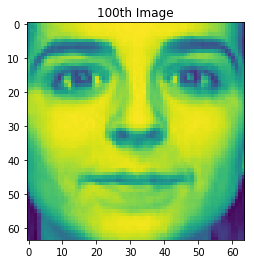

In [161]:
# Storing the 100th face data
image_100 = df_faces.iloc[99]
# Showing the face
plt.imshow(np.array(image_100).reshape(dimension, dimension).T)
plt.title("100th Image")
plt.show()

## (a) Fin.

## (b) 

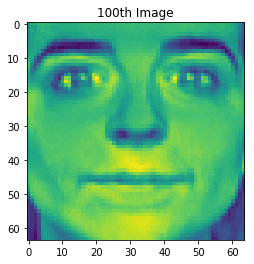

In [162]:
# Create an array for storing the average of each pixel 
arrayAvg = []

i=0
# For loop runs through each column (pixel), takes the average and appends it to the array
for i in range(0,columns):
    avg = df_faces[i].mean()
    arrayAvg.append(avg)
    
# Creating duplicate df for permanent manipulation
df_mean = df_faces

# For loop running through each column (pixel) of new df and subtracting the average pixel
i=0
for i in range(0,columns):
    df_mean[i] = df_mean[i] - arrayAvg[i]
    
# Processing the data for visualization
Q3b = df_mean.iloc[99]
plt.imshow(np.array(Q3b).reshape(dimension, dimension).T)
plt.title("100th Image")
plt.show()

## (b) Fin.

## (c)

In [205]:
#Performing PCA steps:
s_data = preprocessing.scale(df_mean)

pca = PCA()
pca.fit(s_data)
pca_data = pca.transform(s_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' +str(x) for x in range(1, len(per_var)+1)]


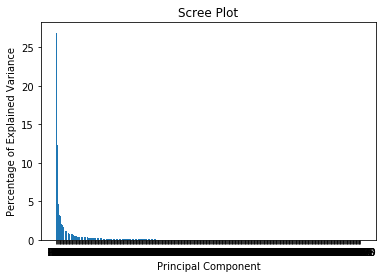

In [206]:
# Taking a peak at the data, SCATTER PLOT IS FURTHER DOWN
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [207]:
# Storing eigen data
eigen_values = pca.explained_variance_
eigen_vectors = pca.components_

In [226]:
# Assigning eigen values/ vectors to a df
eigen_value_df = pd.DataFrame(data=eigen_values)
eigen_vector_df = pd.DataFrame (data=eigen_vectors)

In [227]:
# Sorting eigen_values in descending order
eigen_value_df.sort_values([0],ascending=False)
# Creating an array to hold index range from 1 to 400 for plotting
eigenValueArray = []
# Filling in array with values 1,2,3,....,399,400
for i in range(0,400):
    eigenValueArray.append(i+1)
# Checking df has been ordered in descending correctly
eigen_value_df.head()

,0
0,1103.618370
1,506.810768
2,321.988947
3,192.526050
4,133.298202


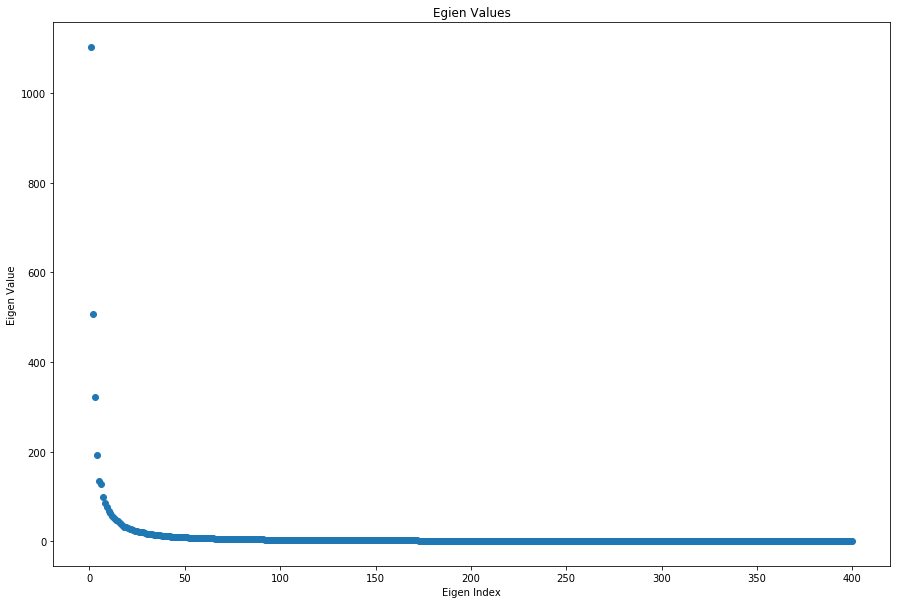

In [228]:
# Plotting eigen values on scatter plot
x = eigenValueArray
y = eigen_value_df[0]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,y)

ax.set_title("Egien Values")
ax.set_xlabel("Eigen Index")
ax.set_ylabel("Eigen Value")

plt.show()

## (c) Fin.

## (d)

In [229]:
# Showing value of last eigen value
eigen_value_df[0].iloc[399]

2.8274905556764215e-30

* The last eigen value is zero for two reasons
* (1) By construction: We have ordered the eigenvalues in descending order, therefore the last item 400 (at position 399) will be the lowest eigenvalue available
* (2) The PCA approach forces the eigenvalues towards zero 

## (d) Fin.

## (e)

In [230]:
# Function will take an array of eigen values and a digit (number) which will correspond to how many eigen values you wish to keep
# Function will return a percentage of variance captured
def eigenKeep(array, n):
    count = 0
    numerator = 0
    denominator = array.sum()
    
    i=0
    for i in range(0,len(array)):
        if i < n:
            numerator += array[0][i]
    print(numerator/denominator)


eigenKeep(eigen_value_df, 22)

0    0.778368
dtype: float64


* GOAL: The goal is ultimately to pick a number of eigen values that captures a good amount of variance, wihtout too many eigen valyes being needed
* Intuitively looking at the graph above, somewhere between 10 and 30 looked to be most efficient based on % variance increase captured with a one unit increase in n (increase of one more eigenvalue).
* for n < 10 not enough variance is captured 
* for n > 30 a one unit increase in n bears poor corresponding increase in variance captured
* n = 22 was chosen as it captures a good amount of variance without too many eigen values

## (e) Fin.

## (f)

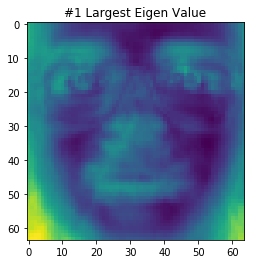

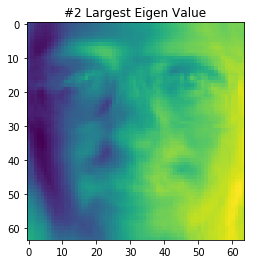

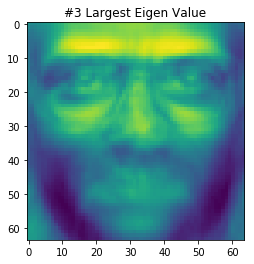

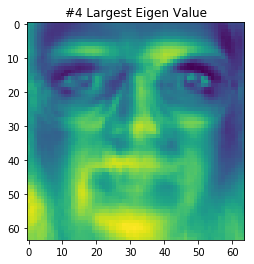

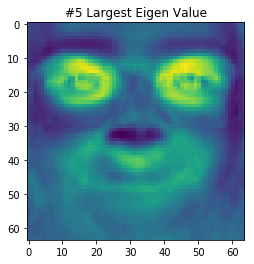

In [231]:
# Taking the 5 largest corresponding eigen vectors to eigen values
for i in range(0,5):
    tmp = eigen_vector_df.iloc[i]
    plt.imshow(np.array(tmp).reshape(dimension, dimension).T)
    plt.title("#"+str(i+1)+" Largest Eigen Value")
    plt.show()

## (f) Fin.

In [268]:
eigen_vector_df.shape

(400, 4096)

# ## (g)

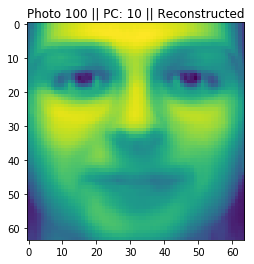

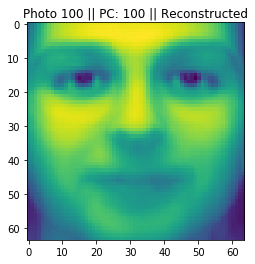

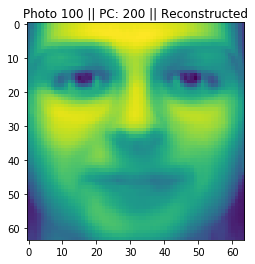

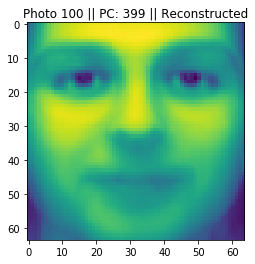

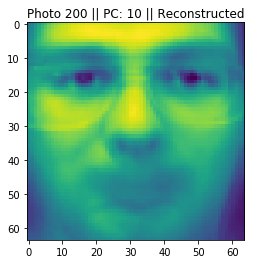

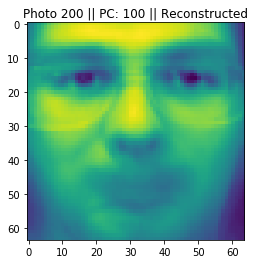

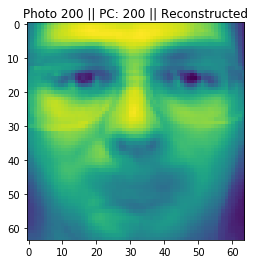

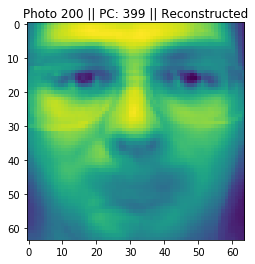

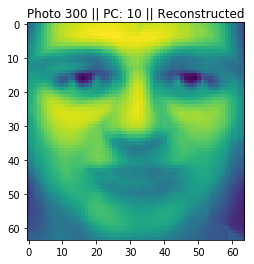

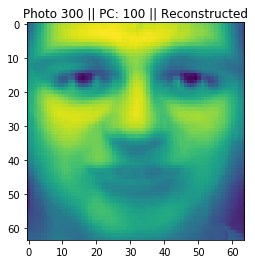

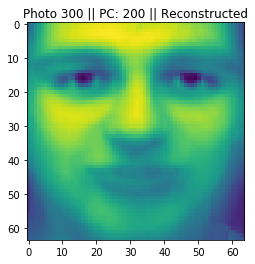

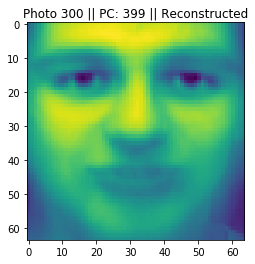

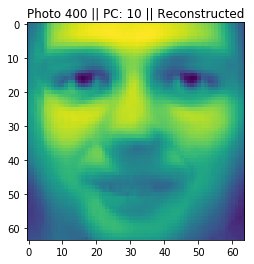

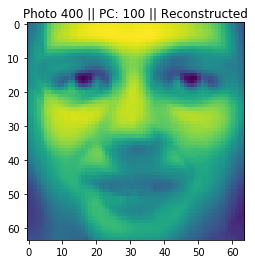

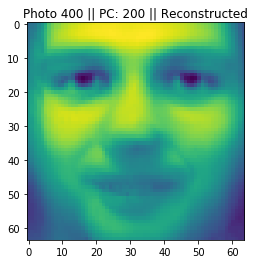

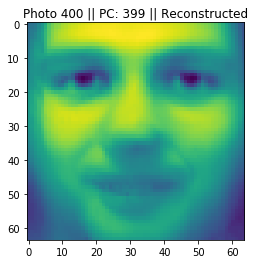

In [267]:
i=0
for i in range(0,columns):
    df_mean[i] = df_mean[i] + arrayAvg[i]
# Defining the photos to be reconstructed
images = [99, 199, 299, 399]
# Defining the PC to be used
pc = [10, 100, 200, 399]

# For loop will iterate through the images and apply the four different PCs to that image
for i in images:
    x_sum = 0
    for j in pc:
        # print("Eigen Vector Shape: ", eigen_vector_df[j].shape)
        tmp_v = eigen_vector_df[j].dot(eigen_vector_df[j].transpose())
        tmp_result = np.array(tmp_v).dot(df_faces.iloc[i])
        x_sum = np.array(tmp_result)
    
        tmp = x_sum
        plt.imshow(np.array(tmp).reshape(dimension, dimension).T)
        plt.title("Photo "+str(i+1)+" || PC: "+ str(j)+" || Reconstructed")
        plt.show()
    

        
        

## (g) Fin.